# Classification - NN
Create a small neural network in keras that classifies the different types of winee. They labels are the columns called "Class".

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Exploratory Data Analysis (EDA)

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/silpai/McGill_DataScience_ML_Certificate/main/wines.csv')
print("df shape:", df.shape)
df.head()

df.describe()

df shape: (178, 14)


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Checking for nulls**

No NULLs were found at the dataset

In [12]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280-OD315_of_diluted_wines    0
Proline                         0
dtype: int64

**Distributions of the Target & Features**

Visualization below indicate unbalanced classes. More wines were from Class 2, followed by 1, and 3.

X shape: (178, 13)
y shape: (178, 1)


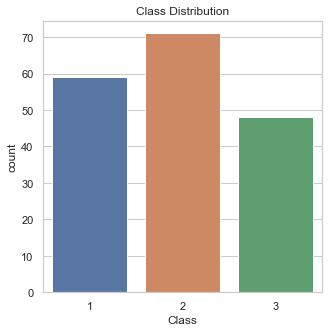

In [13]:
#Separate Features from labels
X=df.drop("Class", axis=1)
print("X shape:", X.shape)

y=df[["Class"]]
print("y shape:", y.shape)

fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = "Class", data=y)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '1'
labels[1] = '2'
labels[2] = '3'
ax.set_xticklabels(labels)
ax.set_title("Class Distribution")
plt.show();

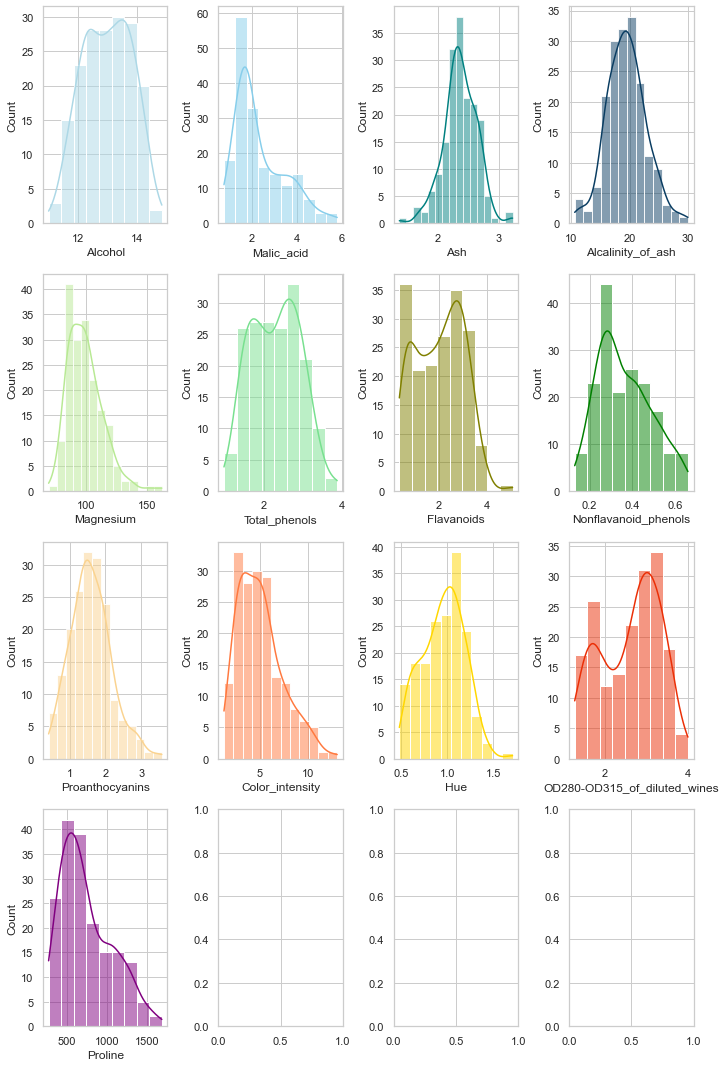

In [14]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(4,4, figsize = (10,15))
sns.histplot(data=df, x="Alcohol", kde=True, color="lightblue", ax=axs[0, 0])
sns.histplot(data=df, x="Malic_acid", kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df, x="Ash", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="Alcalinity_of_ash", kde=True, color="#0a3d62", ax=axs[0, 3])
sns.histplot(data=df, x="Magnesium", kde=True, color="#b8e994", ax=axs[1, 0])
sns.histplot(data=df, x="Total_phenols", kde=True, color="#78e08f", ax=axs[1, 1])
sns.histplot(data=df, x="Flavanoids", kde=True, color="olive", ax=axs[1,2])
sns.histplot(data=df, x="Nonflavanoid_phenols", kde=True, color="green", ax=axs[1, 3])
sns.histplot(data=df, x="Proanthocyanins", kde=True, color="#fad390", ax=axs[2, 0])
sns.histplot(data=df, x="Color_intensity", kde=True, color="#ff793f", ax=axs[2,1])
sns.histplot(data=df, x="Hue", kde=True, color="gold", ax=axs[2, 2])
sns.histplot(data=df, x="OD280-OD315_of_diluted_wines", kde=True, color="#eb2f06", ax=axs[2, 3])
sns.histplot(data=df, x="Proline", kde=True, color="purple", ax=axs[3,0])
fig.tight_layout()
plt.show();

**Features correlation**

Heatmap shows a strong correlation between: Flavanoids and Total_phenols (0.86), Flavanoids and OD280-OD315_of_diluted_wines (0.79). Moderate correlation can be found between OD280-OD315_of_diluted_wines and Total_phenols; Alcohol  and Proline as well as Proanthocyanins and Total_phenols, Flavanoids;
  

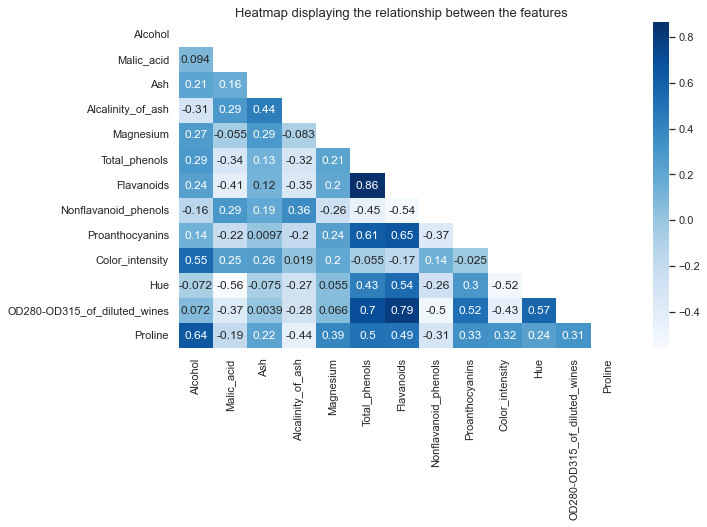

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),cmap=plt.cm.Blues,annot=True, mask=np.triu(X.corr())) # triu for the lower triangle
plt.title('Heatmap displaying the relationship between the features',
         fontsize=13)
plt.show();

**Train the dataset**

Due to **Class** be imbalanced. I used stratified randonm selection on the train_test_split 

In [61]:
#Scaling the features
scaler=StandardScaler().fit(X)
X=scaler.transform(X)

y_dummies=pd.get_dummies(df['Class']).values

#train the data
X_train,X_test,y_train,y_test = train_test_split(X,y_dummies, test_size=0.2, random_state=42,stratify=y) # 10% testing data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (142, 13)
y_train shape: (142, 3)
X_test shape: (36, 13)
y_test shape: (36, 3)


# Building Neural Network

In [62]:
n_cols=X.shape[1]
print("n_cols:", n_cols)

n_class=y['Class'].nunique()
print("n_class:", n_class)

model=Sequential()
#1st layer
model.add(Dense(7,input_shape=(n_cols,),activation="relu", name="1st_layer"))
model.add(Dense(6,activation="relu", name="2nd_layer"))
#outputlarer               
model.add(Dense(n_class,activation="softmax", name="output"))
          
model.compile(optimizer="adam",loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()


n_cols: 13
n_class: 3
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer (Dense)           (None, 7)                 98        
                                                                 
 2nd_layer (Dense)           (None, 6)                 48        
                                                                 
 output (Dense)              (None, 3)                 21        
                                                                 
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________


In [63]:
history=model.fit(X_train, y_train,  epochs=10, batch_size=4, validation_split=0.1)
pred=model.predict(X_test)


Epoch 1/10
32/32 [==============================] - 0s 5ms/step - loss: 1.2697 - accuracy: 0.3780 - val_loss: 1.2544 - val_accuracy: 0.2000
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 1.1573 - accuracy: 0.4409 - val_loss: 1.1273 - val_accuracy: 0.4667
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 1.0602 - accuracy: 0.5591 - val_loss: 1.0282 - val_accuracy: 0.4667
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9761 - accuracy: 0.6063 - val_loss: 0.9503 - val_accuracy: 0.6000
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8953 - accuracy: 0.7087 - val_loss: 0.8540 - val_accuracy: 0.6667
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8085 - accuracy: 0.7638 - val_loss: 0.7514 - val_accuracy: 0.8000
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7248 - accuracy: 0.8031 - val_loss: 0.6381 - val_accuracy: 0.8667
Epoch 8/10
32/32 [==

<AxesSubplot:>

Text(0.5, 1.0, 'Accuracy improvements with Epoch')

Text(0, 0.5, 'train accuracy')

Text(0.5, 0, 'epoch')

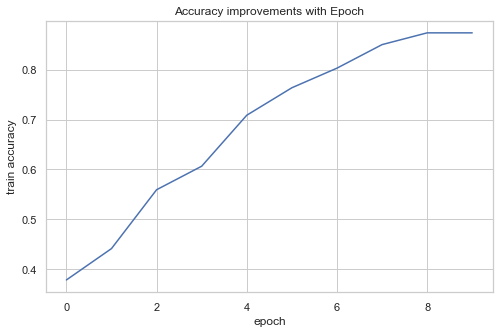


Evaluation against Test Dataset :
------------------------------------
test loss: 0.379
test accuracy: 0.917


In [64]:
#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.ylabel("train accuracy")
plt.xlabel("epoch")
plt.show();

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
score_test=model.evaluate(X_test,y_test,verbose=0)
print("test loss: {0:.3f}".format(score_test[0]))
print("test accuracy: {0:.3f}".format(score_test[1]))


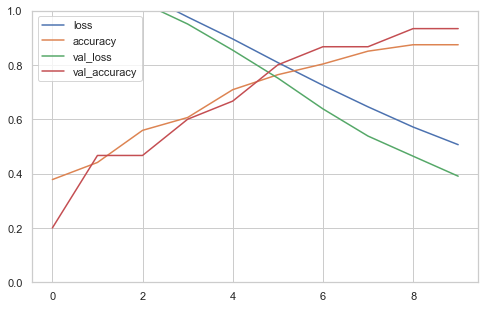

In [65]:
pd.DataFrame(history.history).plot(figsize=(8, 5), ls='-')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show();

**Checking the model with some test data**

wine Class 1 = [1,0,0] ~ ~  position of highest probability = 0

wine Class 2 = [0,1,0] ~ ~  position of highest probability = 1

wine Class 3 = [0,0,1] ~ ~ position of highest probability = 2

In [83]:
Check_index_y=y_test[0:3]
print("Check y_test true labels indexes o to 3: ", Check_index_y)


# Predict on first 3 records of the test data
preds =model.predict(X_test[0:3])
# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:34} | {}".format('Model Predictions probabilities','position of highest probability'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,preds_chosen[i]))

Check y_test true labels indexes o to 3:  [[1 0 0]
 [0 0 1]
 [1 0 0]]
Model Predictions probabilities    | position of highest probability
[0.7772477  0.13284832 0.08990395] | 0
[0.26690957 0.36038283 0.37270764] | 2
[0.88955843 0.05953691 0.05090467] | 0
